# Data Exploration

In [1]:
import pandas as pd

In [2]:
# Load the dataset
data = pd.read_csv('http://bit.ly/w-data')

In [3]:
#initial data inspection
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [5]:
#descriptive statistics - to generate summary statistics for the numeric columns. 
#This includes count, mean, standard deviation, minimum, and maximum values.
print(data.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


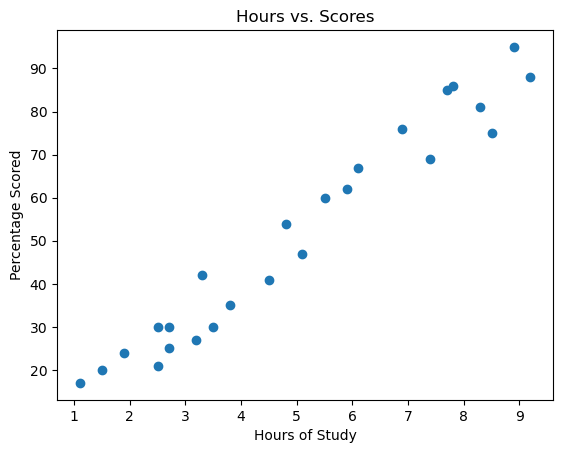

In [6]:
#data visualization
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(data['Hours'], data['Scores'])
plt.title('Hours vs. Scores')
plt.xlabel('Hours of Study')
plt.ylabel('Percentage Scored')
plt.show()

Upon plotting this data, you should be able to observe whether the points follow a linear pattern. If the points form a roughly straight line or a clear linear trend, it indicates a linear relationship. 

# Data Preprocessing
Check for any missing values or outliers and handle them if necessary.
Split the data into training and testing sets. A common split is 80% for training and 20% for testing.

In [7]:
#Handling Missing Values and Outliers
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Splitting the data
Split the data into training and testing sets. The training set is used to train the model, 
and the testing set is used to evaluate its performance. A common split is 80% for training and 20% for testing. 
You can use the train_test_split function from scikit-learn to perform this split.

In [8]:
from sklearn.model_selection import train_test_split

X = data['Hours'].values.reshape(-1, 1)
y = data['Scores']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Select a model
Since this is a simple linear regression task, you can use linear regression to build your model. You can use libraries like scikit-learn in Python.

In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

#This code creates a LinearRegression object, and then the fit method is used to train the model 
#using the training data (X_train and y_train). Now, your model has learned the relationship between 
#the number of study hours and the corresponding scores in the training data.

LinearRegression()

After training the model, you can move on to Step 5, where you make predictions using the trained model. 
In your case, you want to predict the percentage scored if a student studies for 9.25 hours per day.

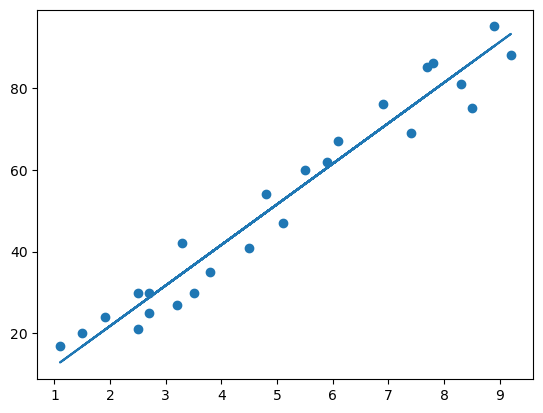

In [10]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Making Predictions

In [11]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [13]:
# Make predictions on new data (e.g., 9.25 hours)
hours_to_predict = np.array([[9.25]])
predicted_score = model.predict(hours_to_predict)[0]
print(f'Predicted score for {hours_to_predict[0][0]} hours of study: {predicted_score:.2f}')

Predicted score for 9.25 hours of study: 93.69


# Model Evaluation

In [14]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
